### 1. Scrapping the data

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"  #The main URL where all the British Airways reviews are located.
pages = 40                    #There are 40 pages of reviews on the site .
page_size = 100               #Each page displays 100 reviews.

reviews = []                  #This list will hold all the extracted review text as the script scrapes each page.

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"  #Builds the full URL for each paginated review page. (sortby=post_date%3ADesc) → sorts by most recent first.

    # Collect HTML data from this page
    response = requests.get(url)    #Sends an HTTP GET request to fetch the HTML content of the current page.

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')  #Parses the HTML using BeautifulSoup
    for para in parsed_content.find_all("div", {"class": "text_content"}): #Finds all <div> elements with the class "text_content" — these contain the actual review text.
        reviews.append(para.get_text())            #Extracts the text and appends it to the reviews list.

    print(f"   ---> {len(reviews)} total reviews") #After processing each page, it prints how many reviews have been collected so far.

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()  #Creates an empty DataFrame using Pandas.
df["reviews"] = reviews  #Adds a new column called "reviews" to the DataFrame.
df.head()  #Displays the first 5 rows of the DataFrame by default.

,reviews
0,✅ Trip Verified | Check-in was slow with onl...
1,Not Verified | Check in was smooth enough. Bo...
2,✅ Trip Verified | Although transferring to thi...
3,✅ Trip Verified | We are extremely grateful ...
4,✅ Trip Verified | I had an appalling experie...


In [5]:
df.to_csv("British_Airways_reviews.csv")

### 2. Exploring the downloaded dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as plio
plio.templates
import plotly.graph_objs as go
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from warnings import filterwarnings
filterwarnings(action='ignore')

In [7]:
data = pd.read_csv('British_Airways_reviews.csv')

In [8]:
data

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Check-in was slow with onl...
1,1,Not Verified | Check in was smooth enough. Bo...
2,2,✅ Trip Verified | Although transferring to thi...
3,3,✅ Trip Verified | We are extremely grateful ...
4,4,✅ Trip Verified | I had an appalling experie...
...,...,...
3936,3936,HKG-LHR in New Club World on Boeing 777-300 - ...
3937,3937,LHR to HAM. Purser addresses all club passenge...
3938,3938,My son who had worked for British Airways urge...
3939,3939,London City-New York JFK via Shannon on A318 b...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3941 non-null   int64 
 1   reviews     3941 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.7+ KB


In [11]:
df.describe()

# count: Total number of reviews
# unique: Number of unique reviews
# top: Most frequent review (if any repeats)
# freq: How often the most frequent one appears

,reviews
count,3941
unique,3933
top,St Lucia to London round trip. Full flight bot...
freq,2


In [13]:
# Split the text into two columns
data[['Verification Status', 'review']] = data['reviews'].str.split('|', n=1, expand=True)

# Remove leading and trailing whitespaces
data['Verification Status'] = data['Verification Status'].str.strip()
data['review'] = data['review'].str.strip()

In [14]:
data.head()

,Unnamed: 0,reviews,Verification Status,review
0,0,✅ Trip Verified | Check-in was slow with onl...,✅ Trip Verified,Check-in was slow with only one staff member c...
1,1,Not Verified | Check in was smooth enough. Bo...,Not Verified,Check in was smooth enough. Boarding was chaot...
2,2,✅ Trip Verified | Although transferring to thi...,✅ Trip Verified,Although transferring to this flight through H...
3,3,✅ Trip Verified | We are extremely grateful ...,✅ Trip Verified,We are extremely grateful to the crew of fligh...
4,4,✅ Trip Verified | I had an appalling experie...,✅ Trip Verified,I had an appalling experience with British Air...


In [15]:
data = data.drop('Unnamed: 0', axis=1)

In [16]:
data['Verification Status'].value_counts()

,count
Verification Status,
✅ Trip Verified,1329
✅ Verified Review,770
Not Verified,292
❎ Unverified,20
❎ Not Verified,5
...,...
"I'm not one for publishing reviews but following discussions of flight problems, have just heard of Skytrax. I have lost track of the numbers of flights I've taken over the years, on business in Europe and on holiday worldwide. With family in the US, regular flights have almost exclusively till now been with British Airways: some economy, some WTP, more recently in Business. Service, value etc has to now ranged from acceptable to good, occasionally excellent. Shame things seem to have changed. For our annual trip last December I booked my 7-year old daughter and myself on British Airways LHR to Chicago, returning from Washington Dulles to LHR. Both flights in Business Class. Booking process online reasonably good, with helpful assistance from a ""real person"" when there was a problem - which happened 3 times in the months before departure. No common sense used when flights are cancelled and ""suitable alternatives"" booked, when seats had been pre-purchased, when clearly travelling with a child. Check-in and departure were smooth. Travel in economy means that they feed children first. Travel in business and they serve children serve after the adults. The ""child meal"" (when it eventually arrived) was a disgrace, I wouldn't feed it to an animal! Peas blackened, mash dried and crusty. Not surprisingly she didn't want it. Ended up eating my meal. Entertainment screen (essential for children and part of the treat of the journey) didn't work, so we swopped seats - so no entertainment screen for Mummy! Thank goodness I had my Kindle. No apologies from staff. More interested in the male business travellers. Return flight after Christmas from Washington Dulles to LHR was slightly better. Evening meal available in lounge prior to boarding - providing you're an adult. Again nothing for children except some biscuits. If I'm willing to pay British Airways Business Class fares for myself and my daughter, I expect better service than this. Very disappointed. Will I fly BA again? Yes, but grudgingly and once the airmiles are used up who knows?",1
"London Heathrow to San Francisco with British Airways and unimpressed. Checked in online but had a bag to drop: I was issued with a fresh boarding pass at the airport, and was there plenty early enough. Everything seemed normal until I reached the gate for boarding - the scanner at the final checkpoint reported ""not checked in"". After a 5 minute or so wait, I was allowed to board, but moved to a different seat (I was told this was the final one, but not given any explanation as to why). Once on the plane, I was asked to move to what turned out to be my original seat. I filled in BAs feedback form about this and asked what was going on, but they were apparently receiving a high volume of complaints and never responded. In the circumstances, I think I'll stick with more reliable airlines from now on. The flight itself was delayed by a 1/2 hour while they waited for ""more passengers"". The flight itself was uneventful, and the meals and service okay for economy. Having said that, the Boeing 747 is horribly outdated, and the IFE system repeatedly failed and had to be rebooted.",1
"First and last time travelling with British Airways. The flight outw was reasonable, although they are sadly lacking in comparison to other airlines. My first question is does anybody from British Airways actually read these comments? If they do how can they go on providing a service that is so bad? We arrived in Toronto on 9th September to be told our luggage had been left at Heathrow along with 80 other bags. They were well prepared at Toronto to deal with us having been forwarned of the problem - after filling in the relevant forms we were informed that our bags would be with us in 24 hours, nut it was 2.5 days later when we were finally reunited with them. British Airways should investiage

### B. Creating a separate dataset for verified trips and reviews

In [25]:
filtered_data = data[data['Verification Status'].isin(['✅ Trip Verified', ' ✅ Verified Review','✅ Verified Review'])]

In [26]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2099 entries, 0 to 2590
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              2099 non-null   object
 1   Verification Status  2099 non-null   object
 2   review               2099 non-null   object
dtypes: object(3)
memory usage: 65.6+ KB


In [28]:
filtered_data = filtered_data.drop('reviews', axis=1)
filtered_data

,Verification Status,review
0,✅ Trip Verified,Check-in was slow with only one staff member c...
2,✅ Trip Verified,Although transferring to this flight through H...
3,✅ Trip Verified,We are extremely grateful to the crew of fligh...
4,✅ Trip Verified,I had an appalling experience with British Air...
7,✅ Trip Verified,I really like flying British Airways particula...
...,...,...
2585,✅ Verified Review,Istanbul to London Heathrow with British Airwa...
2586,✅ Verified Review,"London Heathrow to Houston on British Airways,..."
2587,✅ Verified Review,We have flown with British Airways over 100 ti...
2588,✅ Verified Review,British Airways from Seattle to Johannesburg v...


In [29]:
filtered_data['Verification Status'].value_counts()

,count
Verification Status,
✅ Trip Verified,1329
✅ Verified Review,770


In [30]:
filtered_data = filtered_data.applymap(lambda x: x.replace('✅ ', '') if pd.notna(x) else x)
#is used to remove the '✅ ' emoji prefix from all cells in the DataFrame filtered_data, wherever it exists .


Let’s break it down:

🔁 `applymap(...)`

Applies a function to every single element in the DataFrame.
Useful when you want to modify each cell individually .

🧠 `lambda x: x.replace('✅ ', '') if pd.notna(x) else x`

For each cell value x:

If x is not null , and contains '✅ ', it removes '✅ ' (replaces it with an empty string).

If x is null , it leaves it as-is (else x).

In [31]:
filtered_data.head()

,Verification Status,review
0,Trip Verified,Check-in was slow with only one staff member c...
2,Trip Verified,Although transferring to this flight through H...
3,Trip Verified,We are extremely grateful to the crew of fligh...
4,Trip Verified,I had an appalling experience with British Air...
7,Trip Verified,I really like flying British Airways particula...


In [32]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2099 entries, 0 to 2590
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  2099 non-null   object
 1   review               2099 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB


### C. Using Wordclouds for sentiment analysis for Verified trips and reviews

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


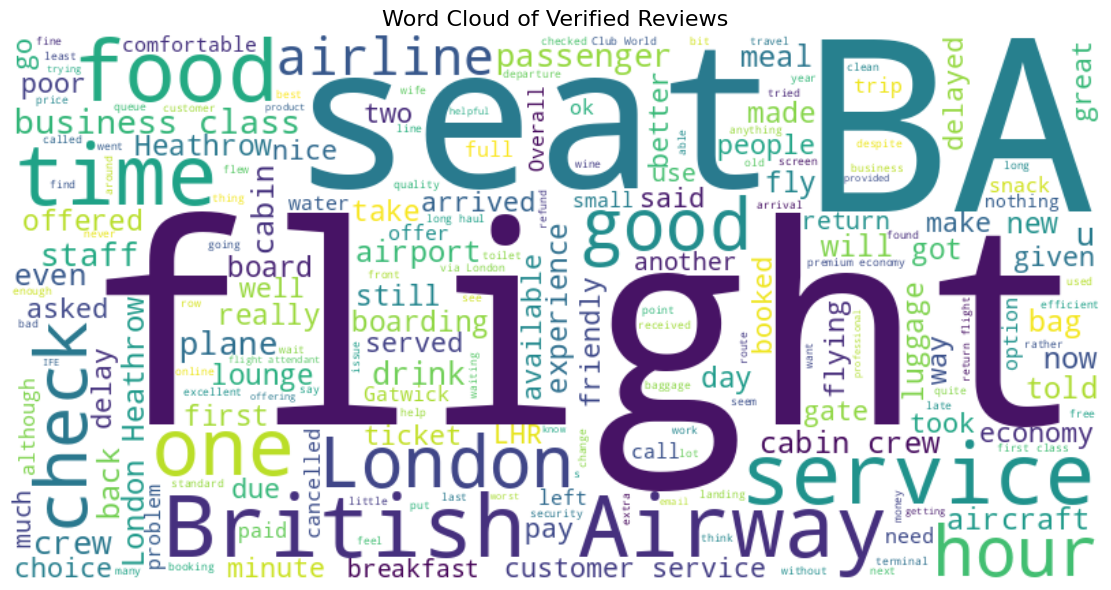

                                              review  Sentiment_Score  \
0  Check-in was slow with only one staff member c...          -0.6705   
2  Although transferring to this flight through H...           0.9496   
3  We are extremely grateful to the crew of fligh...           0.8016   
4  I had an appalling experience with British Air...          -0.9924   
7  I really like flying British Airways particula...           0.9652   

  Sentiment_Label  
0        Negative  
2        Positive  
3        Positive  
4        Negative  
7        Positive  


In [36]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Ensure VADER lexicon is downloaded
nltk.download('vader_lexicon')

# 1. Assign DataFrame
filtered_df = filtered_data.copy()

# 2. Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# 3. Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis
filtered_df['Sentiment_Score'] = filtered_df['review'].apply(get_sentiment_score)

# 4. Optional: Add sentiment label (Positive, Neutral, Negative)
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

filtered_df['Sentiment_Label'] = filtered_df['Sentiment_Score'].apply(classify_sentiment)

# 5. Generate Word Cloud
all_reviews = ' '.join(filtered_df['review'].astype(str))
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      max_words=200).generate(all_reviews)

# 6. Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Verified Reviews", fontsize=16)
plt.tight_layout()
plt.show()

# Optional: Show first few rows with sentiment
print(filtered_df[['review', 'Sentiment_Score', 'Sentiment_Label']].head())

In [39]:
# Analyze overall sentiment
average_sentiment = filtered_df['Sentiment_Score'].mean() #The Sentiment_Score is a compound score from -1 to +1 , where:
print(f'Average Sentiment: {average_sentiment:.2f}') #Calculates the average sentiment score across all reviews.

# Categorize sentiment
filtered_df['Sentiment_Label'] = filtered_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative') #Adds a new column 'Sentiment_Label' based on the Sentiment_Score.
# Uses .apply() to assign:
# 'Positive' if score > 0
# 'Neutral' if score == 0
# 'Negative' if score < 0


# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = filtered_df['Sentiment_Label'].value_counts().reset_index() #Counts how many reviews fall into each sentiment category.
#Converts that into a clean DataFrame called sentiment_label_counts.
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']


#Creates a bar chart showing how many reviews fall into each sentiment label.
# Built-in Plotly Color Sequence...auto colors
fig = px.bar(
    sentiment_label_counts,
    x='Sentiment_Label',
    y='Count',
    color='Sentiment_Label',
    labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Count'},
    color_discrete_map={
        'Positive': 'teal',
        'Neutral': 'gold',
        'Negative': 'darkred'
    },
    title='Sentiment Labels Distribution for verified trips'
)

# Add text annotations to each bar
for i, count in enumerate(sentiment_label_counts['Count']):
    fig.add_annotation(
        x=sentiment_label_counts['Sentiment_Label'][i],
        y=count + 23,  # Adjust the value for vertical positioning of the text
        text=str(count),
        showarrow=False,
        font=dict(color='black', size=12)
    )

fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Number of reviews')
fig.show()

Average Sentiment: 0.06


In [60]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.pie(sentiment_label_counts, values='Count', names='Sentiment_Label',
             title='Sentiment Labels Distribution for verified trips',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'teal', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             hole=0.2  # Set the size of the center hole in the pie chart
             )

fig.show()

In [40]:
filtered_df

,Verification Status,review,Sentiment_Score,Sentiment_Label
0,Trip Verified,Check-in was slow with only one staff member c...,-0.6705,Negative
2,Trip Verified,Although transferring to this flight through H...,0.9496,Positive
3,Trip Verified,We are extremely grateful to the crew of fligh...,0.8016,Positive
4,Trip Verified,I had an appalling experience with British Air...,-0.9924,Negative
7,Trip Verified,I really like flying British Airways particula...,0.9652,Positive
...,...,...,...,...
2585,Verified Review,Istanbul to London Heathrow with British Airwa...,0.9413,Positive
2586,Verified Review,"London Heathrow to Houston on British Airways,...",0.9472,Positive
2587,Verified Review,We have flown with British Airways over 100 ti...,-0.1796,Negative
2588,Verified Review,British Airways from Seattle to Johannesburg v...,0.9436,Positive


In [41]:
filtered_df.to_csv('Verfied-Trips_sentiment-score_and_label.csv')

### D. Creating a separate dataset for unverified trips and reviews

In [45]:
unverified_filtered_data = data[data['Verification Status'].isin(['Not Verified','❎ Not Verified', '❎ Unverified'])]
unverified_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 1 to 2101
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              317 non-null    object
 1   Verification Status  317 non-null    object
 2   review               317 non-null    object
dtypes: object(3)
memory usage: 9.9+ KB


In [44]:
unverified_filtered_data = unverified_filtered_data.drop('reviews', axis=1)
unverified_filtered_data['Verification Status'].value_counts()

,count
Verification Status,
Not Verified,292
❎ Unverified,20
❎ Not Verified,5


In [48]:
unverified_filtered_data = unverified_filtered_data.applymap(lambda x: x.replace('❎ ', '') if pd.notna(x) else x)
unverified_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 1 to 2101
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              317 non-null    object
 1   Verification Status  317 non-null    object
 2   review               317 non-null    object
dtypes: object(3)
memory usage: 9.9+ KB


In [49]:
unverified_filtered_data.head()

,reviews,Verification Status,review
1,Not Verified | Check in was smooth enough. Bo...,Not Verified,Check in was smooth enough. Boarding was chaot...
5,"Not Verified | Good points, the cabin crew, t...",Not Verified,"Good points, the cabin crew, they were helpful..."
6,"Not Verified | It was a decent flight, reason...",Not Verified,"It was a decent flight, reasonable comfortable..."
15,Not Verified | LHR T5 BA Gold Wing worked wel...,Not Verified,LHR T5 BA Gold Wing worked well. Pleasant chec...
16,Not Verified | Very good service on this rout...,Not Verified,Very good service on this route BA2710 30th Ma...


### E. Using Wordclouds for sentiment analysis for unverified trips and reviews

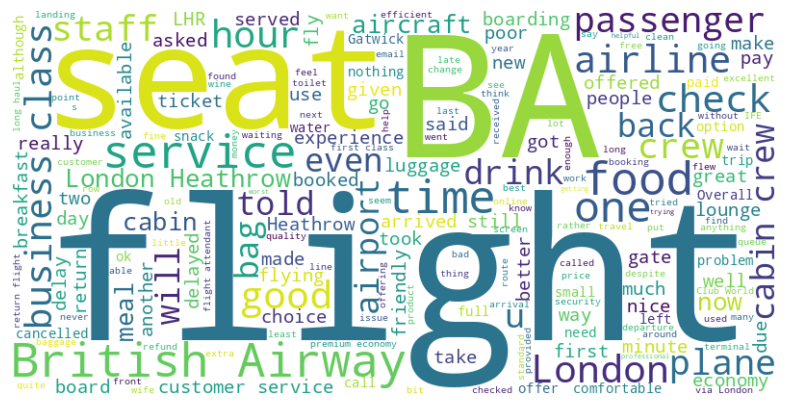

In [50]:
unverified_filtered_df = unverified_filtered_data

# Sentiment analysis using nltk
sia = SentimentIntensityAnalyzer()
unverified_filtered_df['Sentiment_Score'] = unverified_filtered_df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a WordCloud
all_reviews = ' '.join(filtered_df['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
# Analyze overall sentiment
average_sentiment = unverified_filtered_df['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')

# Categorize sentiment
unverified_filtered_df['Sentiment_Label'] = unverified_filtered_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = unverified_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']


fig = px.bar(
    sentiment_label_counts,
    x='Sentiment_Label',
    y='Count',
    color='Sentiment_Label',
    labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Count'},
    color_discrete_map={
        'Positive': 'teal',
        'Neutral': 'gold',
        'Negative': 'darkred'
    },
    title='Sentiment Labels Distribution for unverified trips'
)
# Add text annotations to each bar
for i, count in enumerate(sentiment_label_counts['Count']):
    fig.add_annotation(
        x=sentiment_label_counts['Sentiment_Label'][i],
        y=count + 23,  # Adjust the value for vertical positioning of the text
        text=str(count),
        showarrow=False,
        font=dict(color='black', size=12)
    )

fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Number of reviews')
fig.show()

Average Sentiment: 0.01


In [57]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = unverified_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.pie(sentiment_label_counts, values='Count', names='Sentiment_Label',
             title='Sentiment Labels Distribution for unverified trips',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'teal', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             hole=0.2  # Set the size of the center hole in the pie chart
             )

fig.show()

In [61]:
unverified_filtered_df.to_csv('Unverfied Trips sentiment score and label.csv')

### F. Creating a separate dataset for reviews that are niether 'verified trips and reviews' nor 'unverified trips and reviews'

In [62]:
# List of values to exclude
exclude_values = ['Not Verified', '❎ Not Verified', '❎ Unverified', '✅ Trip Verified', ' ✅ Verified Review','✅ Verified Review']

# Filter and sort the DataFrame
sorted_filtered_data = data[~data['Verification Status'].isin(exclude_values)].sort_values('Verification Status')


In [63]:
sorted_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 3739 to 225
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              1525 non-null   object
 1   Verification Status  1525 non-null   object
 2   review               2 non-null      object
dtypes: object(3)
memory usage: 47.7+ KB


In [64]:
sorted_filtered_data = sorted_filtered_data.drop('reviews', axis=1)

In [65]:
sorted_filtered_data['Verification Status'].value_counts()

,count
Verification Status,
"Aberdeen-Heathrow-Miami and return World Traveller Plus (premium economy). Received a text from BA at 0600 that our 09:30 ABZ-LHR flight had been cancelled which would impact upon the US flight. Phoned the helpline as suggested. Utterly useless options provided by their staff which was weighted towards a ticket refund - no use for a family holiday. Made unsuitable suggestions including can you get to Aberdeen for the 7:30 flight (it was 7am and had now spent 1hr on phone to them). Gave up and just went to the airport. Fortunately BA staff there were excellent and got me on next flight to Heathrow despite breaching their own min of 1 hour requirement for connections. Flight to London was good with good service leather seats. Cabin crew facilitated us getting off plane first and BA staff member met us to get us to next gate ASAP for Miami flight. Service centre useless but face to face staff great. LHR-MIA flight. Aircraft a 747 was old and tatty and WT+ seats were rubbish in comparison to Virgin product that I have experienced. Not that comfortable. Seat back TV is same as economy namely 4"" across tiny but selection was ok and seats are fabric and didn't seem that much better than economy. Food (beef) was outstanding for aircraft food. Staff were pretty good. Aircraft on time. Return journey much the same but staff were better. Conclusion is that face to face staff great food great. But needs a modern fleet - our 747 was really aged and their world traveller plus product needs work with hindsight probably would have just travelled economy as leg room wasn't that much more. If you take a iPad to watch movies and are not tall economy would do the job. Their helpline needs to be addressed. Clue being in the title - HELPline. Would fly BA again but would think about their WT+ option carefully.",2
St Lucia to London round trip. Full flight both ways quite unhappy staff on return leg tiny seatback screens and poor selection of entertainment meals satisfactory (taste was ok and enough to fill me up both legs on time but was quite expensive for the service I got. Would fly them again if they are the cheaper option.,2
Flew from LGW to Catania. Lounge at Gatwick was good and staff very attentive no lounge at Catania airport and given vouchers instead which we got a rotten cup of coffee from the BA approved cafe next to the non Schengen passport control. Flights both ways were good and we liked the Pilot pointing out Lake Geneva and telling us about our route so nicely. The return flight back to LGW the Captain was hard to hear and wasn't so interesting. That aside on both journeys we felt well looked after with charming FAs. The food was also good too and we landed on time. Baggage came very quickly at LGW but at Catania airport it was a bit of a carnival! I'm afraid Catania airport is the worst airport I've been through but there you go! I think it is one of the joys of travelling.,2
"London Heathrow to Miami on one of British Airways crummy Boeing 747s. Originally Booked WT Plus choosing flight in an A380 with shiny new updated cabin and entertainment system for 3rd year in a row, and for the 3rd year in a row they promptly changed the plane on my flight for a very elderly and not updated Boeing 747. Do BA actually have any A380's? Reasonably comfortable, but the old on demand entertainment system had a poor choice of films and programs. Cabin staff and food okay from memory but, as usual with British Airways nowadays, very small portions. Took off slightly late in fog, made up time on flight and landed slightly early at Miami. Old aircraft notwithstanding I still think WT Plus is well worth the extra - 7 inches of extra legroom is so much more comfortable than coach.",2
Flying from Aberdeen to Toronto via LHR. On board the new 787s on this route you can really notice the difference that they make over the 777. No drying of the eyes or popping of the ears thanks to the good air system. Although a little cr

In [66]:
sorted_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 3739 to 225
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  1525 non-null   object
 1   review               2 non-null      object
dtypes: object(2)
memory usage: 35.7+ KB


In [67]:
non_null_rows = sorted_filtered_data[sorted_filtered_data['review'].notnull()]

# Print the row numbers
print("Row numbers with non-null values:")
print(non_null_rows.index.tolist())

Row numbers with non-null values:
[3559, 225]


In [70]:
row_number = 3559
value_to_add = sorted_filtered_data.loc[row_number, 'review']

sorted_filtered_data.loc[row_number, 'Verification Status'] += value_to_add

In [71]:
sorted_filtered_data = sorted_filtered_data.drop('review', axis=1)

In [72]:
# Rename the 'Verification Status' column to 'review'
sorted_filtered_data = sorted_filtered_data.rename(columns={'Verification Status': 'review'})

### Using Wordclouds for sentiment analysis for reviews that are niether 'verified trips and reviews' nor 'unverified trips and reviews'¶

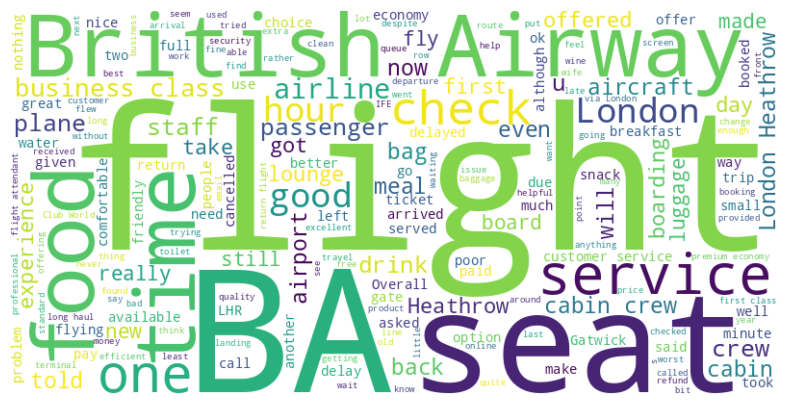

In [73]:
sorted_filtered_data_filtered_df = sorted_filtered_data

# Sentiment analysis using nltk
sia = SentimentIntensityAnalyzer()
sorted_filtered_data_filtered_df['Sentiment_Score'] = sorted_filtered_data_filtered_df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a WordCloud
all_reviews = ' '.join(filtered_df['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
# Analyze overall sentiment
average_sentiment = sorted_filtered_data_filtered_df['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')

# Categorize sentiment
sorted_filtered_data_filtered_df['Sentiment_Label'] = sorted_filtered_data_filtered_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = sorted_filtered_data_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.bar(sentiment_label_counts, x='Sentiment_Label', y='Count', color='Sentiment_Label',
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Count'},
             color_discrete_map={'Positive': 'teal', 'Neutral': 'yellow', 'Negative': 'red'},
             title='Sentiment Labels Distribution for neither verified nor unverified trips')

# Add text annotations to each bar
for i, count in enumerate(sentiment_label_counts['Count']):
    fig.add_annotation(
        x=sentiment_label_counts['Sentiment_Label'][i],
        y=count + 23,  # Adjust the value for vertical positioning of the text
        text=str(count),
        showarrow=False,
        font=dict(color='black', size=12)
    )

fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Number of reviews')
fig.show()

Average Sentiment: 0.32


In [76]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = sorted_filtered_data_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.pie(sentiment_label_counts, values='Count', names='Sentiment_Label',
             title='Sentiment Labels Distribution for neither verified nor unverified trips',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'teal', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             hole=0.2  # Set the size of the center hole in the pie chart
             )

fig.show()

In [77]:
sorted_filtered_data_filtered_df.to_csv('Neither Verified nor Unverfied Trips and reviews.csv')